# 1) import librairies

In [3]:
from odym import ODYM_Classes as msc
from odym import ODYM_Functions as msf
from odym import dynamic_stock_model as dsm 

In [18]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pylab
import numpy as np
import pandas as pd
from scipy.stats import weibull_min

# 2) Define MFA system

In [7]:
ModelClassification  = {} # Create dictionary of model classifications

MyYears_2050 = list(np.arange(2024,2051)) # Data are present for years 2024-2050


In [8]:
# Classification for time labelled 'Time' must always be present, with Items containing a list of odered integers representing years, months, or other discrete time intervals
ModelClassification['Time'] = msc.Classification(Name = 'Time',
                                                 Dimension = 'Time',
                                                 ID = 1,
                                                 Items = MyYears_2050
                                                )

In [9]:
# Classification for cohort is used to track age-cohorts in the stock.
ModelClassification['Cohort'] = msc.Classification(Name = 'Age-cohort',
                                                   Dimension = 'Time',
                                                   ID = 2,
                                                   Items = MyYears_2050
                                                  )

In [10]:
# Classification for elements labelled 'Element' must always be present, with Items containing a list of the symbols of the elements covered.
ModelClassification['Element'] = msc.Classification(Name = 'Elements',
                                                    Dimension = 'Element', 
                                                    ID = 3,
                                                    Items = ['Electric cars']
                                                   )

In [11]:
MyScenarios = ['SSP1', 'SSP2', 'LED']
ModelClassification['Scenario'] = msc.Classification(Name = 'Scenarios',
                                                     Dimension = 'Scenario',
                                                     ID = 4,
                                                     Items = MyScenarios
                                                    )

In [12]:
# Get model time start, end, and duration:
Model_Time_Start = int(min(ModelClassification['Time'].Items))
Model_Time_End   = int(max(ModelClassification['Time'].Items))
Model_Duration   = Model_Time_End - Model_Time_Start

In [14]:
IndexTable = pd.DataFrame({'Aspect'        : ['Time','Age-cohort','Element','Scenario'], # 'Time' and 'Element' must be present!
                           'Description'   : ['Model aspect "time"','Model aspect "age-cohort"', 'Model aspect "Element"','Model aspect "Scenario"'],
                           'Dimension'     : ['Time','Time','Element','Scenario'], # 'Time' and 'Element' are also dimensions
                           'Classification': [ModelClassification[Aspect] for Aspect in ['Time','Cohort','Element','Scenario']],
                           'IndexLetter'   : ['t','c','e','s']}) # Unique one letter (upper or lower case) indices to be used later for calculations.

IndexTable.set_index('Aspect', inplace = True) # Default indexing of IndexTable, other indices are produced on the fly
IndexTable

,Description,Dimension,Classification,IndexLetter
Aspect,,,,
Time,"Model aspect ""time""",Time,<odym.ODYM_Classes.Classification object at 0x...,t
Age-cohort,"Model aspect ""age-cohort""",Time,<odym.ODYM_Classes.Classification object at 0x...,c
Element,"Model aspect ""Element""",Element,<odym.ODYM_Classes.Classification object at 0x...,e
Scenario,"Model aspect ""Scenario""",Scenario,<odym.ODYM_Classes.Classification object at 0x...,s


In [15]:
#System definition


Dyn_MFA_System = msc.MFAsystem(Name = 'MFA EV', 
                      Geogr_Scope = 'Germany', 
                      Unit = 'unit', 
                      ProcessList = [], 
                      FlowDict = {}, 
                      StockDict = {},
                      ParameterDict = {}, 
                      Time_Start = Model_Time_Start, 
                      Time_End = Model_Time_End, 
                      IndexTable = IndexTable, 
                      Elements = IndexTable.loc['Element'].Classification.Items) # Initialize MFA system

In [16]:
#process definition

Dyn_MFA_System.ProcessList = [] # Start with empty process list, only process numbers (IDs) and names are needed.
Dyn_MFA_System.ProcessList.append(msc.Process(Name = 'Outside scope', ID   = 0))
Dyn_MFA_System.ProcessList.append(msc.Process(Name = 'Cars in use'  , ID   = 1))
Dyn_MFA_System.ProcessList.append(msc.Process(Name = 'Recycling'  , ID   = 2))


# Print list of processes:
Dyn_MFA_System.ProcessList

In [20]:
### Time to input the life time of PVs
Lifetime = [15]
Shape = [3.6]

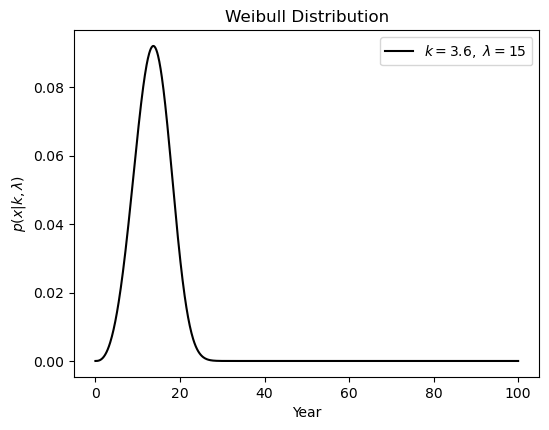

In [21]:

#------------------------------------------------------------
# plot the distributions
x = np.linspace(0, 100, 1000)
fig, ax = plt.subplots(figsize=(6, 4.5))


dist = weibull_min(Shape[0], 0, Lifetime[0])
plt.plot(x, dist.pdf(x), c='black',
         label=r'$k=%.1f,\ \lambda=%i$' % (Shape[0], Lifetime[0]))

plt.xlabel('Year')
plt.ylabel(r'$p(x|k,\lambda)$')
plt.title('Weibull Distribution')

plt.legend()
plt.show()

### flows

In [81]:
np.linspace(1000,27000,len(MyYears_2050))
# len(MyYears_2050)

array([ 1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,  8000.,
        9000., 10000., 11000., 12000., 13000., 14000., 15000., 16000.,
       17000., 18000., 19000., 20000., 21000., 22000., 23000., 24000.,
       25000., 26000., 27000.])

In [82]:
car_stock_pd=pd.DataFrame(np.zeros((len(MyYears_2050),len(MyScenarios))),columns=['Number of cars SSP1 (unit)','Number of cars SSP2 (unit)','Number of cars LED (unit)'])
car_stock_pd['Year']=MyYears_2050
car_stock_pd['Number of cars SSP1 (unit)']=np.linspace(1000,27000,len(MyYears_2050))
car_stock_pd

,Number of cars SSP1 (unit),Number of cars SSP2 (unit),Number of cars LED (unit),Year
0,1000.0,0.0,0.0,2024
1,2000.0,0.0,0.0,2025
2,3000.0,0.0,0.0,2026
3,4000.0,0.0,0.0,2027
4,5000.0,0.0,0.0,2028
5,6000.0,0.0,0.0,2029
6,7000.0,0.0,0.0,2030
7,8000.0,0.0,0.0,2031
8,9000.0,0.0,0.0,2032
9,10000.0,0.0,0.0,2033


In [83]:
# Initialize StockArray with the correct shape (Scenarios x Years)
StockArray = np.zeros((len(MyScenarios), len(MyYears_2050)))

# Fill StockArray with PV area demands for each scenario
StockArray[0, :] = car_stock_pd['Number of cars SSP1 (unit)'].values
StockArray[1, :] = car_stock_pd['Number of cars SSP2 (unit)'].values
StockArray[2, :] = car_stock_pd['Number of cars LED (unit)'].values


In [84]:
ParameterDict = {}

#
ParameterDict['Stock']= msc.Parameter(Name = 'Car demand', ID = 1, P_Res = 1,
                                       MetaData = None, Indices = 's,t', 
                                      Values = StockArray, Unit = 'kt/yr')

#
ParameterDict['eta']   = msc.Parameter(Name = 'mean product lifetime', ID = 2, P_Res = 1, 
                                       MetaData = None, 
                                       Values = Lifetime, Unit = 'yr')
ParameterDict['beta'] = msc.Parameter(Name = 'Shape parameter', ID = 3, P_Res = 1,
                                       MetaData = None, 
                                       Values = Shape, Unit = 'yr')

ParameterDict['lt_rec']   = msc.Parameter(Name = 'mean recycling lifetime', ID = 2, P_Res = 1, 
                                       MetaData = None, 
                                       Values = [1], Unit = 'yr')
ParameterDict['sd_rec'] = msc.Parameter(Name = 'Shape parameter', ID = 3, P_Res = 1,
                                       MetaData = None, 
                                       Values = [0.5], Unit = 'yr')

# Assign parameter dictionary to MFA system:
Dyn_MFA_System.ParameterDict = ParameterDict

In [85]:
# Define the flows of the system, and initialise their values:
Dyn_MFA_System.FlowDict['F_0_1'] = msc.Flow(Name = 'PoM', P_Start = 0, P_End = 1,
                                            Indices = 't,s,e', Values=None)
Dyn_MFA_System.FlowDict['F_1_2'] = msc.Flow(Name = 'Waste to recycling', P_Start = 1, P_End = 2,
                                            Indices = 't,c,s,e', Values=None)
Dyn_MFA_System.FlowDict['F_1_0'] = msc.Flow(Name = 'Waste not recycled', P_Start = 1, P_End = 0,
                                            Indices = 't,c,s,e', Values=None)
Dyn_MFA_System.FlowDict['F_2_0a'] = msc.Flow(Name = 'Steel recycled', P_Start = 2, P_End = 0,
                                            Indices = 't,c,s,e', Values=None)
Dyn_MFA_System.FlowDict['F_2_0b'] = msc.Flow(Name = 'Loss', P_Start = 2, P_End = 0,
                                            Indices = 't,c,s,e', Values=None)
Dyn_MFA_System.StockDict['S_1']   = msc.Stock(Name = 'Car stock', P_Res = 1, Type = 0,
                                              Indices = 't,c,s,e', Values=None)
Dyn_MFA_System.StockDict['dS_1']  = msc.Stock(Name = 'Car stock change', P_Res = 1, Type = 1,
                                              Indices = 't,s,e', Values=None)

Dyn_MFA_System.StockDict['S_2']   = msc.Stock(Name = 'Recycling stock', P_Res = 1, Type = 0,
                                              Indices = 't,c,s,e', Values=None)
Dyn_MFA_System.StockDict['dS_2']  = msc.Stock(Name = 'Recycling chaneg stock', P_Res = 1, Type = 1,
                                              Indices = 't,s,e', Values=None)

Dyn_MFA_System.Initialize_FlowValues() # Assign empty arrays to flows according to dimensions.
Dyn_MFA_System.Initialize_StockValues() # Assign empty arrays to flows according to dimensions.

In [86]:
# Check whether flow value arrays match their indices, etc. See method documentation.
Dyn_MFA_System.Consistency_Check() 

(True, True, True)

## MFA calculations and balance check

In [105]:
recycling_rate=0.3 # value between 0 and 100% from process 1 to 2
loss_recycling=0.5 #value between 0 and 100% loss during recycling process

In [106]:
age_cohort = np.zeros((len(MyScenarios), len(MyYears_2050), len(MyYears_2050))) ### Scenario x (Year x Age cohort)
O_C = np.zeros((len(MyScenarios), len(MyYears_2050), len(MyYears_2050)))
I_C = np.zeros((len(MyScenarios), len(MyYears_2050), len(MyYears_2050)))

Outflow_rec_process = np.zeros((len(MyScenarios), len(MyYears_2050), len(MyYears_2050)))
Stock_recycling_process= np.zeros((len(MyScenarios), len(MyYears_2050), len(MyYears_2050)))
Stock_by_cohort_evol = np.zeros((len(MyScenarios), len(MyYears_2050), len(MyYears_2050)))

In [107]:
for scenario in np.arange(0,len(MyScenarios)): # from the first scenario (index 0) to the last region (Python does not use the last index on the right side of an interval)
    # Create helper DSM for computing the dynamic stock model:
    DSM_Stock = dsm.DynamicStockModel(t = np.array(MyYears_2050),
                                      s = Dyn_MFA_System.ParameterDict['Stock'].Values[scenario,:], 
                                      lt = {
                                             'Type': 'Weibull', 
                                             'Scale': Dyn_MFA_System.ParameterDict['eta'].Values,
                                             'Shape': Dyn_MFA_System.ParameterDict['beta'].Values,
                                            }
                                      )
    #### Solve the system for 2024-2050
    age_cohort[scenario,:,:], O_C[scenario,:,:], I_C[scenario,:,:] = DSM_Stock.compute_stock_driven_model()
    
    
    Dyn_MFA_System.StockDict['S_1'].Values[0:len(MyYears_2050),:,scenario,0] = age_cohort[scenario,0:len(MyYears_2050),:]
    Dyn_MFA_System.FlowDict['F_0_1'].Values[0:len(MyYears_2050),scenario,0] = I_C[scenario,0,0:len(MyYears_2050)]
    Dyn_MFA_System.FlowDict['F_1_0'].Values[0:len(MyYears_2050),:,scenario,0] = (1-recycling_rate)*O_C[scenario,0:len(MyYears_2050),:]
    Dyn_MFA_System.FlowDict['F_1_2'].Values[0:len(MyYears_2050),:,scenario,0] = (recycling_rate)*O_C[scenario,0:len(MyYears_2050),:]
    DS = DSM_Stock.compute_stock_change()
    Dyn_MFA_System.StockDict['dS_1'].Values[0:len(MyYears_2050),scenario,0] = DS[0:len(MyYears_2050)]
    # DSM_Inflow = dsm.DynamicStockModel(t = np.array(MyYears_2050),
    #                                    i = Dyn_MFA_System.FlowDict['F_1_2'].Values[0:len(MyYears_2050),:,scenario,0],
    #                                    lt = {'Type': 'Normal', 'Mean': Dyn_MFA_System.ParameterDict['lt_rec'].Values,
    #                                          'StdDev':  Dyn_MFA_System.ParameterDict['sd_rec'].Values}
    #                                   )
    # Stock_recycling_process[scenario,:,:]=DSM_Inflow.compute_s_c_inflow_driven()
    # Outflow_rec_process[scenario,:,:]=DSM_Inflow.compute_o_c_from_s_c()
    Dyn_MFA_System.FlowDict['F_2_0a'].Values[0:len(MyYears_2050),:,scenario,0] = (1-loss_recycling)*Dyn_MFA_System.FlowDict['F_1_2'].Values[0:len(MyYears_2050),:,scenario,0]
    Dyn_MFA_System.FlowDict['F_2_0b'].Values[0:len(MyYears_2050),:,scenario,0] = (loss_recycling)*Dyn_MFA_System.FlowDict['F_1_2'].Values[0:len(MyYears_2050),:,scenario,0]
    
    print('-------------------- SCENARIO_%d --------------------' %(scenario+1))
    Bal = Dyn_MFA_System.MassBalance()
    print('Dimensions of balance are: time step x process x chemical element')
    print(Bal.shape) # dimensions of balance are: time step x process x chemical element
    print('Sum of all absolute balancing errors by process.')
    print(np.abs(Bal).sum(axis = 0)) # reports the sum of all absolute balancing errors by process.

-------------------- SCENARIO_1 --------------------
Dimensions of balance are: time step x process x chemical element
(27, 3, 1)
Sum of all absolute balancing errors by process.
[[3.30828698e-11]
 [3.36513040e-11]
 [0.00000000e+00]]
-------------------- SCENARIO_2 --------------------
Dimensions of balance are: time step x process x chemical element
(27, 3, 1)
Sum of all absolute balancing errors by process.
[[3.30828698e-11]
 [3.36513040e-11]
 [0.00000000e+00]]
-------------------- SCENARIO_3 --------------------
Dimensions of balance are: time step x process x chemical element
(27, 3, 1)
Sum of all absolute balancing errors by process.
[[3.30828698e-11]
 [3.36513040e-11]
 [0.00000000e+00]]


# Visualization

In [108]:
flow_data = Dyn_MFA_System.StockDict['S_1'].Values[:,:,0,0].sum(axis =1)
flow_df = pd.DataFrame(flow_data, columns=[f"Flow_Scenario"])  # Name the column based on the scenario index

# Save the DataFrame to Excel
# flow_df.to_excel("flow_data_scenario_m.xlsx", index=False)

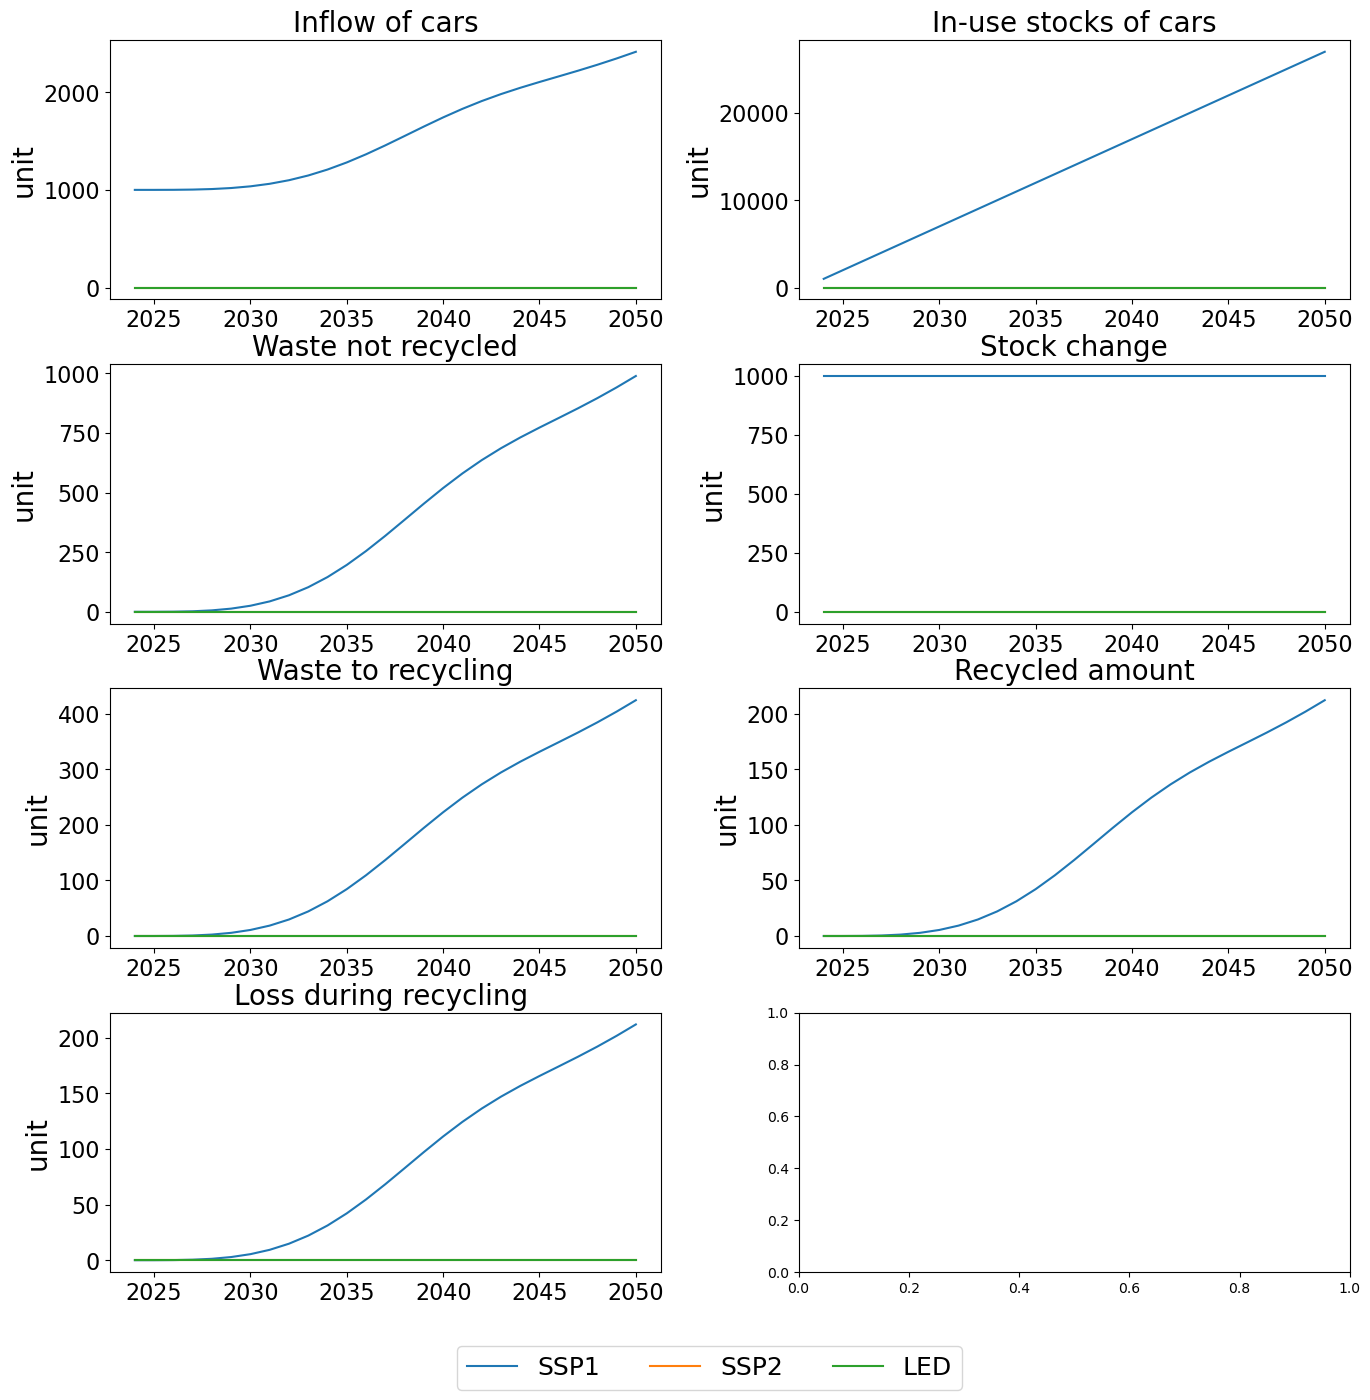

In [109]:
fig, axs = plt.subplots(4, 2, figsize=(16, 16))
MyColorCycle = pylab.cm.tab10(np.arange(0,1,0.1)) # select 10 colors from the 'tab10' color map.

# plot the data and set titles
for m in range(0,len(MyScenarios)):
    axs[0,0].plot(Dyn_MFA_System.IndexTable['Classification']['Time'].Items, 
                  Dyn_MFA_System.FlowDict['F_0_1'].Values[:,m,0], 
                  color = MyColorCycle[m,:])
    axs[0, 1].plot(Dyn_MFA_System.IndexTable['Classification']['Time'].Items, 
                       Dyn_MFA_System.StockDict['S_1'].Values[:,:,m,0].sum(axis =1), 
                   color = MyColorCycle[m,:])
    axs[1, 0].plot(Dyn_MFA_System.IndexTable['Classification']['Time'].Items, 
                   Dyn_MFA_System.FlowDict['F_1_0'].Values[:,:,m,0].sum(axis =1), 
                   color = MyColorCycle[m,:])
    axs[1, 1].plot(Dyn_MFA_System.IndexTable['Classification']['Time'].Items, 
                   Dyn_MFA_System.StockDict['dS_1'].Values[:,m,0], 
                   color = MyColorCycle[m,:])
    axs[2, 0].plot(Dyn_MFA_System.IndexTable['Classification']['Time'].Items, 
                   Dyn_MFA_System.FlowDict['F_1_2'].Values[:,:,m,0].sum(axis =1), 
                   color = MyColorCycle[m,:])
    axs[2, 1].plot(Dyn_MFA_System.IndexTable['Classification']['Time'].Items, 
                   Dyn_MFA_System.FlowDict['F_2_0a'].Values[:,:,m,0].sum(axis =1), 
                   color = MyColorCycle[m,:])
    axs[3, 0].plot(Dyn_MFA_System.IndexTable['Classification']['Time'].Items, 
                   Dyn_MFA_System.FlowDict['F_2_0b'].Values[:,:,m,0].sum(axis =1), 
                   color = MyColorCycle[m,:])
# add subplot titles
axs[0, 0].set_title('Inflow of cars', fontsize=20)
axs[0, 1].set_title('In-use stocks of cars', fontsize=20)
axs[1, 0].set_title('Waste not recycled', fontsize=20)
axs[1, 1].set_title('Stock change', fontsize=20)
axs[2, 0].set_title('Waste to recycling', fontsize=20)
axs[2, 1].set_title('Recycled amount', fontsize=20)
axs[3, 0].set_title('Loss during recycling ', fontsize=20)
# format ticks font size
axs[0, 0].tick_params(axis='both', which='major', labelsize=16)  
axs[0, 1].tick_params(axis='both', which='major', labelsize=16)
axs[1, 0].tick_params(axis='both', which='major', labelsize=16)
axs[1, 1].tick_params(axis='both', which='major', labelsize=16) 
axs[2, 0].tick_params(axis='both', which='major', labelsize=16) 
axs[2, 1].tick_params(axis='both', which='major', labelsize=16) 
axs[3, 0].tick_params(axis='both', which='major', labelsize=16) 

# add y-axis titles
axs[0, 0].set_ylabel('unit',fontsize =20)
axs[0, 1].set_ylabel('unit',fontsize =20)
axs[1, 0].set_ylabel('unit',fontsize =20)
axs[1, 1].set_ylabel('unit',fontsize =20)
axs[2, 0].set_ylabel('unit',fontsize =20)
axs[2, 1].set_ylabel('unit',fontsize =20)
axs[3, 0].set_ylabel('unit',fontsize =20)

# Adjust the spacing of the subplots and legend
plt.subplots_adjust(wspace=0.25, hspace=0.25)

# Add the legend to the legend subplot
fig.legend(MyScenarios, loc='center', bbox_to_anchor=(0.5, 0.05), ncol=len(MyScenarios), prop={'size': 18})

# save figure
# fig.savefig('MFA_viz.png',  bbox_inches='tight',format='png', dpi=300)

C:\Users\philippea\AppData\Local\Temp\ipykernel_31324\70215163.py:1: RuntimeWarning: invalid value encountered in divide
  FlowRatio = ((Dyn_MFA_System.FlowDict['F_1_0'].Values[:,:,:,0].sum(axis =1)+Dyn_MFA_System.FlowDict['F_1_2'].Values[:,:,:,0].sum(axis =1)) /


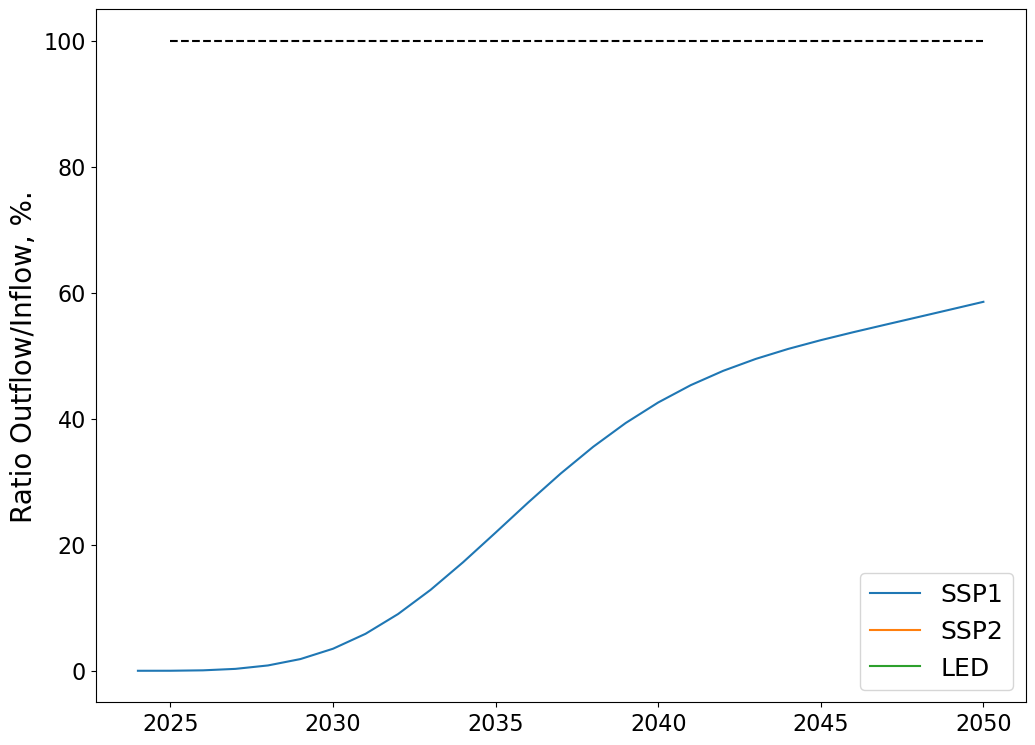

In [100]:
FlowRatio = ((Dyn_MFA_System.FlowDict['F_1_0'].Values[:,:,:,0].sum(axis =1)+Dyn_MFA_System.FlowDict['F_1_2'].Values[:,:,:,0].sum(axis =1)) / 
             Dyn_MFA_System.FlowDict['F_0_1'].Values[:,:,0])

fig, ax = plt.subplots(figsize=(12, 9))
for m in range(0,len(MyScenarios)):
    ax.plot(Dyn_MFA_System.IndexTable['Classification']['Time'].Items, 
            FlowRatio[:,m] * 100, color = MyColorCycle[m,:])
ax.plot([2025,2050],[100,100], color = 'k',linestyle = '--')
ax.set_ylabel('Ratio Outflow/Inflow, %.',fontsize =20)
ax.legend(MyScenarios, loc='best',prop={'size':18})
ax.tick_params(axis='both', which='major', labelsize=16) 


# fig.savefig('Ratio.png', bbox_inches='tight',format='png', dpi=300)